In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df1=pd.read_excel("C:\Users\sicon\Documents\kora\Problem1_PharmacyPrices_Data.xlsx")
df1.head()


,date,Store,Category,Producer,ProductID,MaxAllowedPrice,Units,Price
0,2016-11-23,Omnicare,Analgesics,Biolex,8704649609931669504,23.08,20,17.53
1,2016-11-23,Hy-Vee,NaN,Sterling Drug,7636080208865399808,30.49,10,25.92
2,2016-11-23,Kaiser Permanente,NaN,Sterling Drug,7636080208865399808,30.49,10,27.44
3,2016-11-23,Omnicare,NaN,Sterling Drug,7636080208865399808,30.49,10,23.48
4,2016-11-23,Meijer Groceries,NaN,Sterling Drug,7636080208865399808,30.49,10,24.37


In [3]:
np.sum(df1.isnull()) # most of missing values come from Category and MaxAllowedPrice

date                  0
Store                 0
Category           3458
Producer              0
ProductID             0
MaxAllowedPrice     796
Units                 0
Price                 0
dtype: int64

In [4]:
len(df1['ProductID'].value_counts()) #There are 121 kinds of product in total. 

121

**a) Which Stores price the highest? The lowest?**

In [5]:
#Interpretation 1: find highest and lowest store average price

#Group the dataset by 'Store', calculate the mean price for each store and sort the series. 
#Dorb the Chemist, Inc. has the lowerst average price and CVS has the higher average price. 
#Potentially due to different product orientation at different store

df_price=df1.groupby(by=['Store'])['Price'].mean()
df_price.sort_values()

Store
Dorb the Chemist, Inc.           10.010000
Walgreens                        15.118000
KMart                            16.781852
Shopko Stores Inc.               17.560994
Costco Pharmacies                17.883798
Supervalu                        17.953929
Safeway                          18.142997
Rite Aid                         18.400784
Kroger                           19.274707
Giant Eagle Pharmacy             19.322103
Giant Food Inc.                  19.582736
Giant                            20.054352
Walmart Stores Inc.              20.157157
BI-LO Inc.                       20.569156
Albertsons                       20.909556
Kaiser Permanente                21.110383
Omnicare                         21.129844
Target                           21.376149
Meijer Groceries                 21.609892
Shoprite Supermarkets Inc.       23.359225
Hy-Vee                           23.727444
Medicine Shoppe International    24.820370
Dart Drug                        27.872100
Fred'

In [6]:
table = df1.pivot_table(values='Price', index=['ProductID'], columns=['Store'], aggfunc=np.average)
table = pd.DataFrame(table)
table
price2=pd.DataFrame(table.idxmax(axis=1),columns=['Store_max'])
price2['Store_min']=table.idxmin(axis=1)


,Store_max,Store_min
ProductID,,
65655951279153104,Shoprite Supermarkets Inc.,Safeway
313048965946259008,Medi Mart,Supervalu
343423105157526976,Giant Eagle Pharmacy,Target
426733095999190016,Shoprite Supermarkets Inc.,CVS
463611108689400000,Giant Food Inc.,Supervalu
464269643955800000,Meijer Groceries,Fred's Inc.
491640981067035008,Phar-Mor,Rite Aid
627849173612332032,Meijer Groceries,Walmart Stores Inc.
753984851810407936,Phar-Mor,Dart Drug


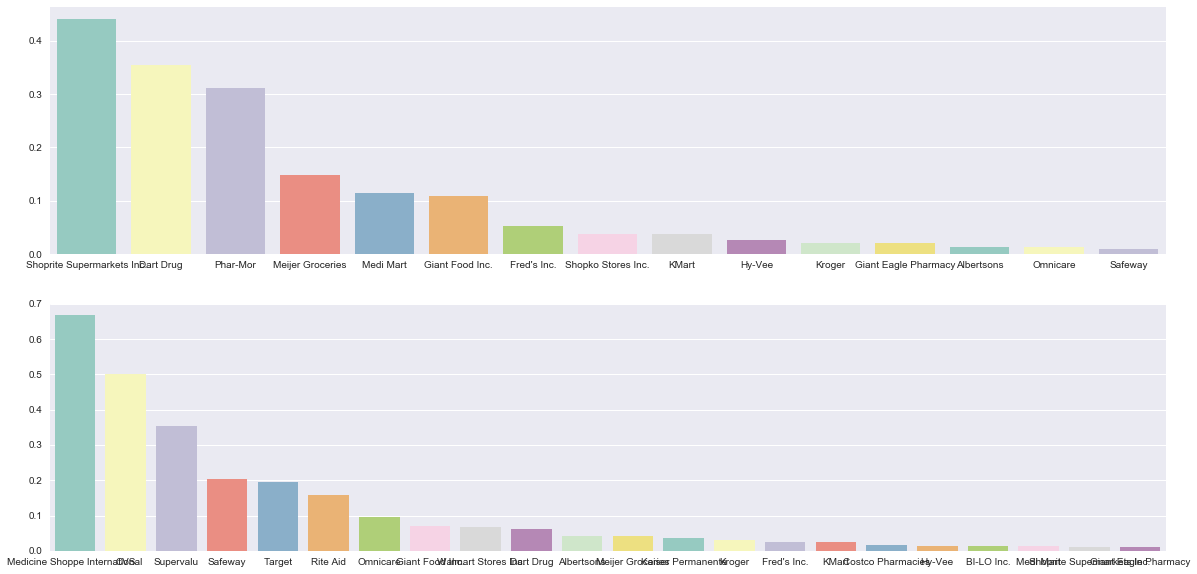

In [57]:
# interpretation 2: find the store of highest and lowest price for every product

#Use pivot table

table = df1.pivot_table(values='Price', index=['ProductID'], columns=['Store'], aggfunc=np.average)
table = pd.DataFrame(table)
total = np.sum(table.isnull())
#price1=pd.DataFrame(table.max(axis=1),columns=['value'])
price2=pd.DataFrame(table.idxmax(axis=1),columns=['Store_max'])
price2['Store_min']=table.idxmin(axis=1)
price2

## Calculate the total numder of products sold by each store
total = len(table)-np.sum(table.isnull())

## Frequency of max/min price of each store
count_max=price2['Store_max'].value_counts(sort=True)
count_min=price2['Store_min'].value_counts(sort=True)

## Percentage of max/min counts in the total products sold for eahc store
percentage_max=(count_max/total[total.index.isin(count_max.index)]).sort_values(ascending=False)
percentage_min=(count_min/total[total.index.isin(count_min.index)]).sort_values(ascending=False)


fig = plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x=percentage_max.index,y=percentage_max.values,palette="Set3")
plt.subplot(2,1,2)
sns.barplot(x=percentage_min.index,y=percentage_min.values,palette="Set3")

#def get_col_name(row):    
    #b = (table.ix[row.name] == row['value'])
    #return b.index[b.argmax()]

#price1.apply(get_col_name, axis=1)
#table['column'] = table.apply(lambda x: table.columns[x.argmax()], axis = 1)


#### *Modification:* 

#### 1) Provided the table of stores having the max average price and min average price for each product .

####                         2) Plot the percentage of products having the max/min price in the total number of product sold by each store

**b) Which Stores change prices most often?**

In [80]:
# Calculate the number of products sold at each store
Product_sold_per_store=df1.groupby(by=['Store'])['ProductID'].nunique()
Product_sold_per_store.sort_values()

Store
Dorb the Chemist, Inc.             1
CVS                                2
Medicine Shoppe International      3
Walgreens                          4
Fred's Inc.                       38
Dart Drug                         48
Rite Aid                          51
Costco Pharmacies                 61
Publix Pharmacies                 61
Phar-Mor                          61
Target                            72
Giant                             72
Albertsons                        73
Hy-Vee                            73
Omnicare                          74
Meijer Groceries                  74
Walmart Stores Inc.               74
BI-LO Inc.                        76
KMart                             78
Shopko Stores Inc.                78
Medi Mart                         78
Kaiser Permanente                 82
Shoprite Supermarkets Inc.        84
Supervalu                         93
Kroger                            94
Safeway                           98
Giant Eagle Pharmacy            

In [81]:
Price_variance.sort_values()

Store
Dorb the Chemist, Inc.             1
CVS                                2
Medicine Shoppe International      4
Walgreens                          4
Rite Aid                          51
Fred's Inc.                       60
Phar-Mor                          61
Dart Drug                         61
Publix Pharmacies                 61
Costco Pharmacies                 62
Giant                             75
Medi Mart                         78
Albertsons                        80
BI-LO Inc.                        80
Kaiser Permanente                101
Supervalu                        102
Hy-Vee                           103
Kroger                           104
Target                           114
KMart                            117
Shopko Stores Inc.               120
Giant Eagle Pharmacy             120
Shoprite Supermarkets Inc.       136
Omnicare                         142
Walmart Stores Inc.              143
Meijer Groceries                 147
Safeway                         

In [91]:
# Group dataset by 'Store' and 'ProductID', and find unique value counts for price.
# the Higher the value, the more changes on price of a store 

Price_unique=df1.groupby(by=['Store','ProductID'])['Price'].nunique()
#df_variance=df_variance.sort_values(ascending=False)
Price_variance=Price_unique.sum(level="Store")

percentage_variance=(Price_variance/Product_sold_per_store).sort_values(ascending=False)

percentage_variance

Store
Meijer Groceries                 1.986486
Walmart Stores Inc.              1.932432
Omnicare                         1.918919
Shoprite Supermarkets Inc.       1.619048
Target                           1.583333
Fred's Inc.                      1.578947
Giant Food Inc.                  1.564356
Shopko Stores Inc.               1.538462
Safeway                          1.510204
KMart                            1.500000
Hy-Vee                           1.410959
Medicine Shoppe International    1.333333
Dart Drug                        1.270833
Kaiser Permanente                1.231707
Giant Eagle Pharmacy             1.212121
Kroger                           1.106383
Supervalu                        1.096774
Albertsons                       1.095890
BI-LO Inc.                       1.052632
Giant                            1.041667
Costco Pharmacies                1.016393
Walgreens                        1.000000
Medi Mart                        1.000000
Phar-Mor                    

#### * Modification:
#### Calculated the total unique price at each store and divided it by the total number of products sold at each store. 1 means there is no variation of price at that store. Higher the value, more the variance of price.

**c) Design a method to determine which Stores drive pricing. What is the result?
What are some cross-checks should you do before reporting the result?**

In [108]:
df2[df2["MaxAllowedPrice"]<df2['Price']]

,date,Store,Category,Producer,ProductID,MaxAllowedPrice,Units,Price,difference_%
ProductID,,,,,,,,,
8704649609931669504,2016-11-23,Shoprite Supermarkets Inc.,Analgesics,Biolex,8704649609931669504,23.080000,20,23.08,-1.847165e-15
9066677097132279808,2016-11-23,Shoprite Supermarkets Inc.,Analgesics,Sterling Drug,9066677097132279808,20.910000,20,20.91,-1.189335e-15
3792490847103280128,2016-11-23,Meijer Groceries,Digestives,Trubion,3792490847103280128,37.580000,16,37.58,-1.512598e-15
2733331426497939968,2016-11-23,Shoprite Supermarkets Inc.,Flu,Sterling Drug,2733331426497939968,18.610000,20,18.61,-1.909035e-15
8932519390500490240,2016-11-23,Meijer Groceries,NaN,Sterling Drug,8932519390500490240,33.830000,30,33.83,-1.680267e-15
343423105157526976,2016-11-23,Shoprite Supermarkets Inc.,Digestives,Zonite Products Corporation,343423105157526976,18.180000,20,18.18,-3.712957e-15
3846572141308239872,2016-11-23,Shoprite Supermarkets Inc.,Digestives,Sterling Drug,3846572141308239872,50.570000,20,50.57,-2.950642e-15
3792490847103280128,2016-11-23,Omnicare,Digestives,Trubion,3792490847103280128,37.580000,16,37.58,-1.512598e-15
1860482568959689984,2016-11-23,Shoprite Supermarkets Inc.,Calming,ViroPharma,1860482568959689984,38.030000,20,38.03,-3.736749e-16


In [103]:
# not very sure about 'drive pricing'. I interpretate the question as find the store that is closed to the max price allowed.
# Since there are missing values in max price allowed. I imputated the column first.

mean_price=df1.groupby(by=['ProductID'])['MaxAllowedPrice'].mean() # find the mean max allowed price for every kind of product
mean_price=mean_price.fillna(mean_price.mean()) #fill na with mean 
mean_price=dict(mean_price) # Convert pandas series to dictionary
mean_price
df_update = pd.DataFrame.from_dict(mean_price, orient='index')
df_update.columns = ["MaxAllowedPrice"]
df2=df1.set_index(df1['ProductID'])
df2.update(df_update)
df2.reset_index(drop=True)
df2['difference_%']=(df2['MaxAllowedPrice']-df2['Price'])/df2['MaxAllowedPrice']
diff=df2.groupby(by=['Store'])['difference_%'].mean()
diff=diff.sort_values(ascending=False)
diff=pd.DataFrame(diff).reset_index()
sales=df2.groupby(by=['Store'])['Units'].sum().sort_values(ascending=False)
sales=pd.DataFrame(sales).reset_index()
diff

# 



,Store,difference_%
0,Walgreens,0.511995
1,"Dorb the Chemist, Inc.",0.510274
2,Supervalu,0.412141
3,Giant Food Inc.,0.388120
4,Safeway,0.386248
5,KMart,0.374281
6,Rite Aid,0.363973
7,Kroger,0.354828
8,Shopko Stores Inc.,0.344657
9,Medicine Shoppe International,0.337984


In [104]:
sales

,Store,Units
0,Safeway,18451
1,Kaiser Permanente,17788
2,Giant Food Inc.,17387
3,Giant Eagle Pharmacy,17163
4,Supervalu,17018
5,Shoprite Supermarkets Inc.,16796
6,Omnicare,16620
7,Meijer Groceries,16610
8,Albertsons,15080
9,Target,14305


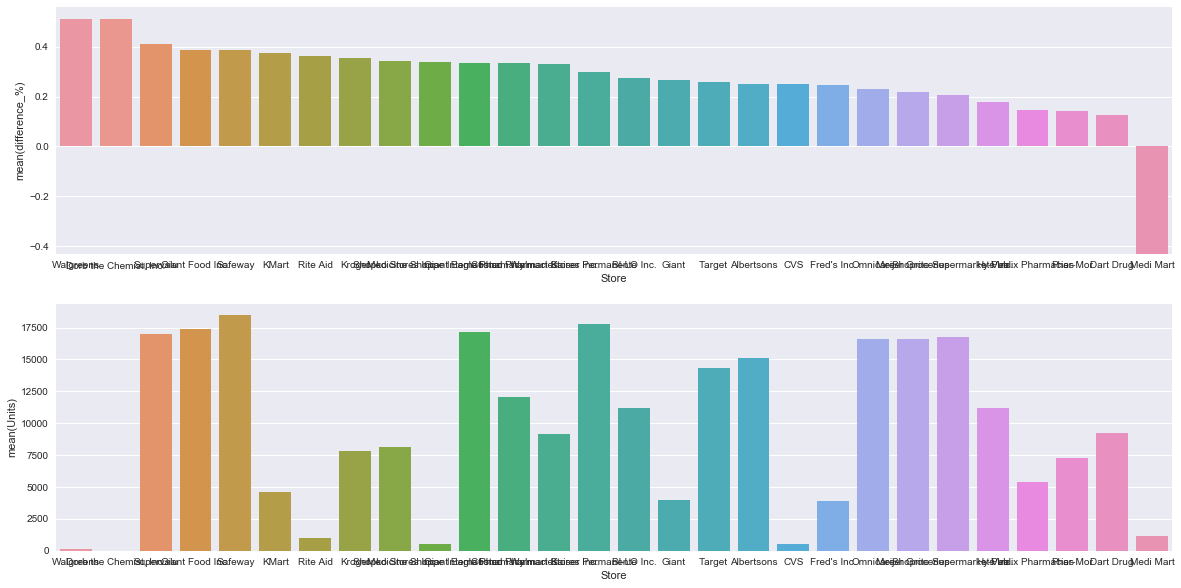

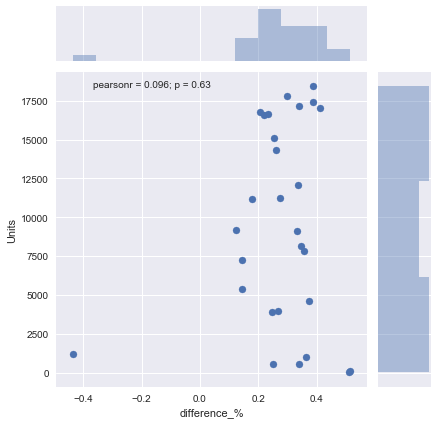

In [106]:
compare=diff.merge(sales,on='Store')
compare

f, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))

sns.jointplot(x='difference_%',y='Units',data=compare,kind='scatter')
sns.barplot(x='Store',y='difference_%',data=compare,ax=ax1)
sns.barplot(x='Store',y='Units',data=compare,ax=ax2)

# Medi Mart is price driving because its average price is most close to MaxAllowedPrice. 
# The plots indicate that there is no strong correlation between price driving and unit sold. 

####  *Modification*:
####  Use (MaxPriceAllowed-Price)/(MaxPriceAllowed) to find the price driven store. There is a negative value, should be outlier. 

**Q2** 

**a) Using all available data (i.e. imputing as necessary), estimate the cumulative
sales as of 2017-01-28 . Give an uncertainty on your answer.**

In [4]:
import sqlite3
conn=sqlite3.connect('C:\Users\sicon\Documents\kora\Problem2_PlatformSales.sqlite3')
c=conn.cursor()
c.execute("SELECT SUM(cumulative_sales_min),SUM(cumulative_sales_max) From salesrank where date LIKE '2017-01-28 %'")
for i in c:
    print i

# Sum the cumulative_sales_min and cumulative_sales_max on 2017-01-28. It privides the range of cumulative sales on that day. 
# I did not do any imputation because I assume '0' means no sales of certain merchant on the specified day. 



(253372310.0, 604730000.0)


**b) Make a plot showing the fraction of contracts that have ended by (year, business
quarter).**

In [55]:
c.execute("SELECT strftime('%Y', contract_expiration_date) as valYear, COUNT(contract_expiration_date) as expired FROM salesrank GROUP BY valYear ORDER BY expired desc")

c.execute("SELECT strftime('%Y', contract_expiration_date) as valYear, (cast(strftime('%m', contract_expiration_date) as integer) + 2) / 3 as quarters, COUNT(contract_expiration_date) as expired FROM salesrank GROUP BY valYear, quarters")

c.close()

*By year*
![title](year.png)


In [112]:
# By yaer and quarter
df4=pd.read_excel('C:\Users\sicon\Documents\kora\Book1.xlsx',sheetname='Sheet1', header=0)
df4


,valYear,quarters,expired
0,1970,1,238071
1,2013,4,41
2,2014,2,64
3,2014,3,11
4,2014,4,11
5,2015,2,33
6,2015,3,11
7,2015,4,11
8,2016,1,11
9,2016,2,4


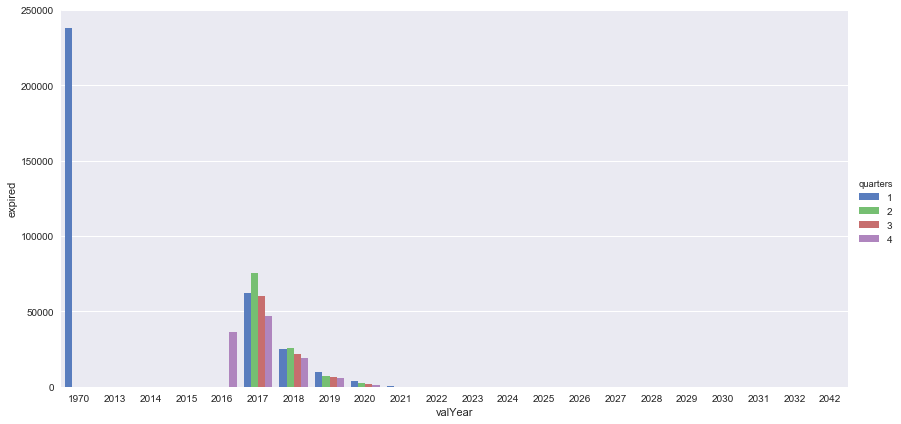

In [111]:
sns.factorplot(x = 'valYear', y = 'expired', hue = 'quarters', data = df4, kind="bar", palette="muted",size=6, aspect=2)


#### *Modification:
#### Corrected code for finding the expiration quater. 

**Q3**

**a) Given a sample size of 50 customers for each location and assuming the total
number of customers at each location is effectively infinite, estimate the
irreducible part of the standard deviation in the repayment rate across locations.**

In [115]:
# According to Central Limit Theorom, Var(xbar)=sigma^2/n. 
# So,sigma^2=var(xbar)*n
from scipy.stats import binom
rate=[0.88, 0.7, 0.88, 0.76, 0.9, 0.96, 0.88, 0.84, 0.8, 0.88, 0.86, 0.92, 
      0.88, 0.88, 0.66, 0.9, 0.86, 0.84, 0.72, 0.72, 0.78, 0.74, 0.76, 0.82, 
      0.82]
#variance= np.var(rate)*25
#variance
p=np.average(rate)
n=50
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
var

array(7.199232)

**b) Given there are only 500 locations in total, how many would need to be surveyed
to bring the standard error on the mean repayment rate under 1% (assuming a
fixed sample size of 50 customers at each location)?**

In [69]:
#sample size=(Z-score)2 * StdDev*(1-StdDev) / (margin of error)2
# number of locations = sample size/50
size = np.square(2.576)*np.sqrt(variance)*(1-np.sqrt(variance))/np.square(0.01)
size/50

312.00628060246532

**c) Which would result in a smaller uncertainty, increasing the number of customers
surveyed at each location to 60, or increasing the number of locations surveyed
to 30?**

In [ ]:
# Assuming we want to determine the mean of the rate of this bank. Then we only use the mean at each location as samples. 
# Since the total number of sample is euqal, they should be the same.